In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lifelines as lf
import pingouin as pg

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.6, the latest is 0.3.10.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Survival

In [4]:
MK_surv = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/MK_lifelines.csv')

In [5]:
MK_surv.groupby(['Genotype', 'Treatment', 'Dosage (mg/kg)'])['ID'].count()

Genotype  Treatment  Dosage (mg/kg)
HE        MK-801     1.0                7
          Saline     1.0                6
KO        MK-801     0.5               77
                     1.0               24
          Saline     1.0               73
WT        MK-801     0.5               27
                     1.0               30
          Saline     1.0               36
Name: ID, dtype: int64

In [6]:
km_fit = lf.KaplanMeierFitter()

Text(0.5, 1.0, 'All Groups')

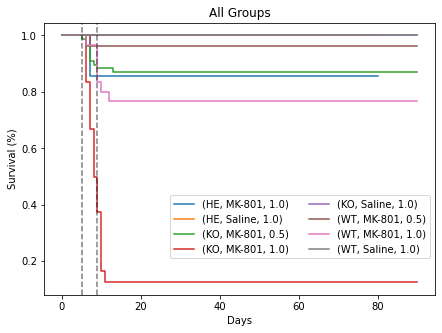

In [7]:
plt.figure(figsize=(7,5))
ax=plt.subplot()
for name, grouped_df in MK_surv.groupby(['Genotype', 'Treatment', 'Dosage (mg/kg)']):
    km_fit.fit(grouped_df["Duration"], grouped_df["Event"], label=name)
    km_fit.plot(ax=ax, ci_show=False)
plt.ylabel('Survival (%)')
plt.xlabel('Days')
ax.legend(fancybox=True, ncol=2, loc = 7, bbox_to_anchor = (1, .25))
plt.axvline(5, ls='--', color = 'k', alpha = .5)
plt.axvline(9, ls='--', color = 'k', alpha = .5)
plt.title('All Groups')

In [8]:
MK_surv['Group'] = MK_surv['Genotype']+'_'+MK_surv['Treatment']+'_'+MK_surv['Dosage (mg/kg)'].astype(str)

In [23]:
plr_test = lf.statistics.pairwise_logrank_test(event_durations = MK_surv['Duration'], event_observed = MK_surv['Event'], groups = MK_surv['Group'])

sig, p_adj = pg.multicomp(plr_test.summary['p'].values, method = 'bonf')

logrank_df = plr_test.summary

logrank_df['Bonferroni adj'] = p_adj.round(5)

In [24]:
logrank_df

test_statistic             p  Bonferroni adj
HE_MK-801_1.0 HE_Saline_1.0        0.857143  3.545395e-01         1.00000
              KO_MK-801_0.5        0.005904  9.387525e-01         1.00000
              KO_MK-801_1.0        9.113418  2.537414e-03         0.07105
              KO_Saline_1.0       10.428571  1.240807e-03         0.03474
              WT_MK-801_0.5        1.091270  2.961900e-01         1.00000
              WT_MK-801_1.0        0.187277  6.651928e-01         1.00000
              WT_Saline_1.0        5.142857  2.334220e-02         0.65358
HE_Saline_1.0 KO_MK-801_0.5        0.842609  3.586517e-01         1.00000
              KO_MK-801_1.0       11.542762  6.801354e-04         0.01904
              KO_Saline_1.0        0.000000  1.000000e+00         1.00000
              WT_MK-801_0.5        0.222222  6.373519e-01         1.00000
              WT_MK-801_1.0        1.595404  2.065558e-01         1.00000
              WT_Saline_1.0        0.000000  1.000000e+00         1.00000
KO_MK-801_0.5 KO_MK-801_1.0       55.838197  7.868775e-14         0.00000
              KO_Saline_1.0       10.087312  1.492937e-03         0.04180
              WT_MK-801_0.5        1.808163  1.787287e-01         1.00000
              WT_MK-801_1.0        1.379009  2.402700e-01         1.00000
              WT_Saline_1.0        5.030262  2.490813e-02         0.69743
KO_MK-801_1.0 KO_Saline_1.0      107.639474  3.223995e-25         0.00000
              WT_MK-801_0.5       38.147075  6.560801e-10         0.00000
              WT_MK-801_1.0       26.190774  3.092968e-07         0.00001
              WT_Saline_1.0       56.316444  6.169728e-14         0.00000
KO_Saline_1.0 WT_MK-801_0.5        2.703704  1.001154e-01         1.00000
              WT_MK-801_1.0       18.533699  1.669267e-05         0.00047
              WT_Saline_1.0        0.000000  1.000000e+00         1.00000
WT_MK-801_0.5 WT_MK-801_1.0        4.264918  3.890712e-02         1.00000
              WT_Saline_1.0        1.333333  2.482131e-01         1.00000
WT_MK-801_1.0 WT_Saline_1.0        9.337075  2.245637e-03         0.06288

In [11]:
MK_1mg = MK_surv[MK_surv['Dosage (mg/kg)'] == 1]

Text(0.5, 1.0, 'Dosage: 1mg/kg')

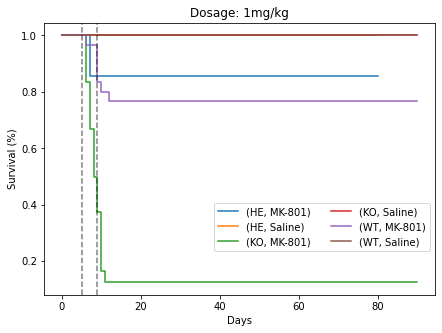

In [12]:
plt.figure(figsize = (7,5))
ax=plt.subplot()
for name, grouped_df in MK_1mg.groupby(['Genotype', 'Treatment']):
    km_fit.fit(grouped_df["Duration"], grouped_df["Event"], label=name)
    km_fit.plot(ax=ax, ci_show=False)
plt.ylabel('Survival (%)')
plt.xlabel('Days')
ax.legend(fancybox=True, ncol=2, loc = 7, bbox_to_anchor = (1, .25))
plt.axvline(5, ls='--', color = 'k', alpha=.5)
plt.axvline(9, ls='--', color = 'k', alpha=.5)
plt.title('Dosage: 1mg/kg')

In [21]:
plr_test = lf.statistics.pairwise_logrank_test(event_durations = MK_1mg['Duration'], event_observed = MK_1mg['Event'], groups = MK_1mg['Group'])
sig, p_adj = pg.multicomp(plr_test.summary['p'].values, method = 'bonf')

logrank_df = plr_test.summary

logrank_df['Bonferroni adj'] = p_adj.round(5)

In [22]:
logrank_df

test_statistic             p  Bonferroni adj
HE_MK-801_1.0 HE_Saline_1.0        0.857143  3.545395e-01         1.00000
              KO_MK-801_1.0        9.113418  2.537414e-03         0.03806
              KO_Saline_1.0       10.428571  1.240807e-03         0.01861
              WT_MK-801_1.0        0.187277  6.651928e-01         1.00000
              WT_Saline_1.0        5.142857  2.334220e-02         0.35013
HE_Saline_1.0 KO_MK-801_1.0       11.542762  6.801354e-04         0.01020
              KO_Saline_1.0        0.000000  1.000000e+00         1.00000
              WT_MK-801_1.0        1.595404  2.065558e-01         1.00000
              WT_Saline_1.0        0.000000  1.000000e+00         1.00000
KO_MK-801_1.0 KO_Saline_1.0      107.639474  3.223995e-25         0.00000
              WT_MK-801_1.0       26.190774  3.092968e-07         0.00000
              WT_Saline_1.0       56.316444  6.169728e-14         0.00000
KO_Saline_1.0 WT_MK-801_1.0       18.533699  1.669267e-05         0.00025
              WT_Saline_1.0        0.000000  1.000000e+00         1.00000
WT_MK-801_1.0 WT_Saline_1.0        9.337075  2.245637e-03         0.03368

In [15]:
MK_05mg = MK_surv.copy()

In [16]:
MK_05mg.loc[MK_05mg['Treatment']=='Saline', 'Dosage (mg/kg)']  = 0.5

In [155]:
MK_05mg

,ID,Litter,Genotype,Treatment,Dosage (mg/kg),Sex,Duration,Event,Group
0,KO_4.1_4,KO_4.1,KO,Saline,0.5,Fem,90,0,KO_Saline_1.0
1,KO_4.1_5,KO_4.1,KO,Saline,0.5,Fem,90,0,KO_Saline_1.0
2,KO_4.1_1,KO_4.1,KO,MK-801,1.0,Fem,90,0,KO_MK-801_1.0
3,KO_4.1_2,KO_4.1,KO,MK-801,1.0,NaN,6,1,KO_MK-801_1.0
4,KO_4.1_3,KO_4.1,KO,MK-801,1.0,NaN,6,1,KO_MK-801_1.0
...,...,...,...,...,...,...,...,...,...
178,HE_1.4_6,HE_1.4,HE,MK-801,1.0,Male,80,0,HE_MK-801_1.0
179,HE_2.2_1,HE_2.2,HE,MK-801,1.0,Male,75,0,HE_MK-801_1.0
180,HE_2.2_2,HE_2.2,HE,MK-801,1.0,Male,75,0,HE_MK-801_1.0
181,HE_2.2_3,HE_2.2,HE,MK-801,1.0,Male,75,0,HE_MK-801_1.0


In [17]:
MK_05 = MK_05mg[(MK_05mg['Dosage (mg/kg)'] == 0.5) & (MK_05mg['Genotype'] != 'HE')]

Text(0.5, 1.0, 'Dosage: 0.5mg/kg')

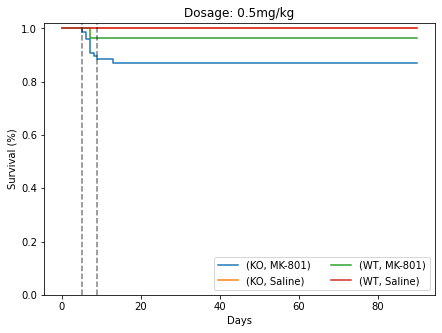

In [18]:
plt.figure(figsize = (7,5))
ax=plt.subplot()
for name, grouped_df in MK_05.groupby(['Genotype', 'Treatment']):
    km_fit.fit(grouped_df["Duration"], grouped_df["Event"], label=name)
    km_fit.plot(ax=ax, ci_show=False)
plt.ylabel('Survival (%)')
plt.xlabel('Days')
ax.legend(fancybox=True, ncol=2)
plt.axvline(5, ls='--', color = 'k', alpha=.5)
plt.axvline(9, ls='--', color = 'k', alpha=.5)
plt.ylim(0, 1.02)
plt.title('Dosage: 0.5mg/kg')

In [19]:
plr_test = lf.statistics.pairwise_logrank_test(event_durations = MK_05['Duration'], event_observed = MK_05['Event'], groups = MK_05['Group'])
sig, p_adj = pg.multicomp(plr_test.summary['p'].values, method = 'bonf')

logrank_df = plr_test.summary

logrank_df['Bonferroni adj'] = p_adj.round(5)

In [20]:
logrank_df

test_statistic         p  Bonferroni adj
KO_MK-801_0.5 KO_Saline_1.0       10.087312  0.001493         0.00896
              WT_MK-801_0.5        1.808163  0.178729         1.00000
              WT_Saline_1.0        5.030262  0.024908         0.14945
KO_Saline_1.0 WT_MK-801_0.5        2.703704  0.100115         0.60069
              WT_Saline_1.0        0.000000  1.000000         1.00000
WT_MK-801_0.5 WT_Saline_1.0        1.333333  0.248213         1.00000

## Growth

In [25]:
MK_grow = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/Weight_clean.csv')

In [124]:
MK_grow.dropna(how='all', inplace = True)

In [125]:
MK_grow.drop(MK_grow.tail(1).index, inplace = True)

In [26]:
MK_grow.groupby(['Genotype', 'Treatment', 'Dosage (mg/kg)'])['ID'].count()

Genotype  Treatment  Dosage (mg/kg)
HE        MK-801     1.0                7
          Saline     1.0                6
KO        MK-801     0.5               81
                     1.0               24
          Saline     1.0               76
WT        MK-801     0.5               27
                     1.0               30
          Saline     1.0               36
Name: ID, dtype: int64

In [38]:
MK_grow.columns

Index(['ID', 'Litter', 'Genotype', 'Treatment', 'Dosage (mg/kg)', 'Sex', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '33', '34', '35', '40', '45', '50', '55', '60', '65',
       '70', '75', '80', '85', '90'],
      dtype='object')

In [27]:
mk_g= MK_grow.melt(id_vars=['ID', 'Litter', 'Genotype', 'Treatment', 'Dosage (mg/kg)', 'Sex'], var_name='Day', value_name = 'Weight')

In [28]:
mk_g['Day'] = mk_g['Day'].astype('float')

In [39]:
mk_g['Group'] = mk_g['Genotype']+'_'+mk_g['Treatment']

Text(0.5, 1.0, 'Growth 1 mg/kg')

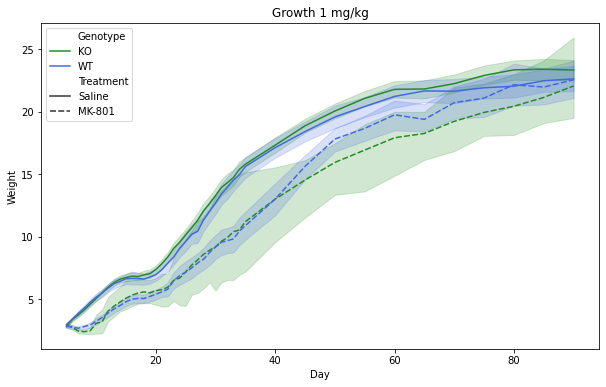

In [33]:
plt.figure(figsize=(10,6))
sns.lineplot(data = mk_g[(mk_g['Dosage (mg/kg)']==1) & (mk_g['Genotype']!= 'HE')], x ='Day', y='Weight', hue='Genotype', style='Treatment', palette=['forestgreen', 'royalblue'], legend= 'brief')
plt.title('Growth 1 mg/kg')

Text(0.5, 1.0, 'Weight 1mg/kg')

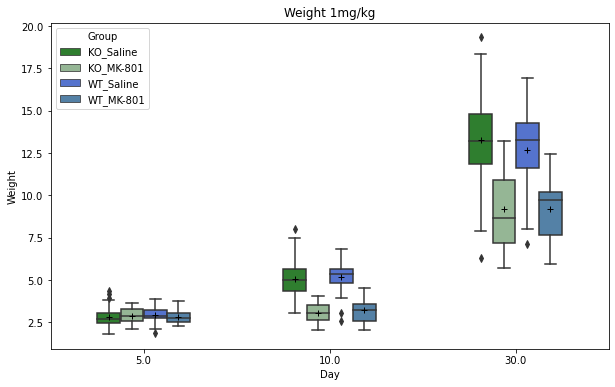

In [75]:
plt.figure(figsize=(10,6))
sns.boxplot(data = mk_g[(mk_g['Dosage (mg/kg)']==1) & (mk_g['Genotype']!= 'HE') & (mk_g['Day'].isin([5, 10, 30]))], x ='Day', y='Weight', hue='Group', palette=['forestgreen', 'darkseagreen', 'royalblue', 'steelblue'], width = 0.5, showmeans = True, meanprops={"marker":"+", "markeredgecolor":"k"})
plt.title('Weight 1mg/kg')

In [56]:
mk_g05 = mk_g.copy()
mk_g05['Dosage (mg/kg)'][mk_g05['Treatment'] == 'Saline'] = 0.5

<ipython-input-56-a05ff3f802cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mk_g05['Dosage (mg/kg)'][mk_g05['Treatment'] == 'Saline'] = 0.5


0         True
1         True
2        False
3        False
4        False
         ...  
12049     True
12050     True
12051     True
12052     True
12053     True
Name: Dosage (mg/kg), Length: 12054, dtype: bool

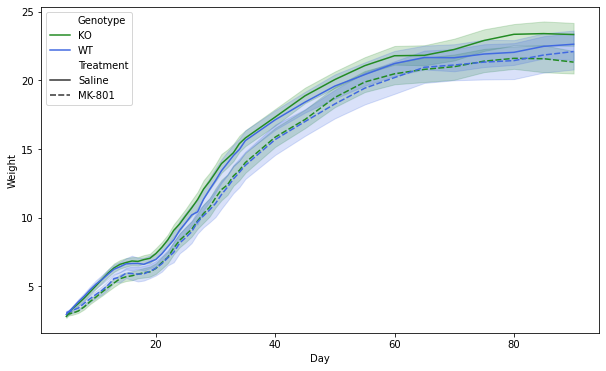

In [59]:
plt.figure(figsize=(10,6))
sns.lineplot(data = mk_g05[(mk_g05['Dosage (mg/kg)']==0.5) & (mk_g05['Genotype']!= 'HE')], x ='Day', y='Weight', hue='Genotype', style='Treatment', palette=['forestgreen', 'royalblue'])

Text(0.5, 1.0, 'Weight 0.5 mg/kg')

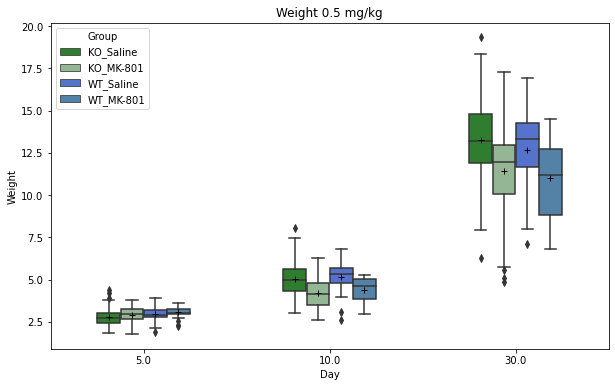

In [74]:
plt.figure(figsize=(10,6))
sns.boxplot(data = mk_g05[(mk_g05['Dosage (mg/kg)']==0.5) & (mk_g05['Genotype']!= 'HE') & (mk_g['Day'].isin([5, 10, 30]))], x ='Day', y='Weight', hue='Group', hue_order =['KO_Saline', 'KO_MK-801', 'WT_Saline', 'WT_MK-801'] , palette=['forestgreen', 'darkseagreen', 'royalblue', 'steelblue'], width = 0.5, showmeans = True, meanprops={"marker":"+", "markeredgecolor":"k"})
plt.title('Weight 0.5 mg/kg')


## Nesting

In [274]:
nest_r = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/Nesting Data.csv')

In [276]:
nest_r['Group'] = nest_r['Genotype']+nest_r['Tx']

In [275]:
nest_r['Tx'] = nest_r['Tx'].str.rstrip()

In [281]:
nest_r.loc[nest_r['Group'] == 'WTNaive', 'Group'] = 'WTSaline'

In [282]:
nest_r.loc[nest_r['Tx']=='Saline', 'Dose (mg/Kg)']  = 1

In [283]:
nest_r.groupby(['Genotype', 'Tx', 'Dose (mg/Kg)'])['Sub'].count()

Genotype  Tx      Dose (mg/Kg)
HE        MK-801  1.0              6
          Saline  1.0              6
KO        MK-801  0.5             19
                  1.0              3
          Saline  1.0             32
WT        MK-801  0.5             17
                  1.0              8
          Saline  1.0             20
Name: Sub, dtype: int64

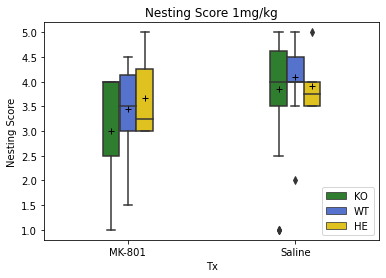

In [284]:
sns.boxplot(data=nest_r[nest_r['Dose (mg/Kg)']==1], x='Tx', y='Nesting Score', hue='Genotype', hue_order = ['KO', 'WT', 'HE'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.3, palette=['forestgreen', 'royalblue', 'gold'])
plt.title('Nesting Score 1mg/kg')
plt.legend(loc=4)


### Effects of MK-801 on WT mice

In [228]:
out = pg.madmedianrule(nest_r[(nest_r['Genotype']=='WT')&(nest_r['Tx']=='Saline')]['Nesting Score'])
idx = nest_r[(nest_r['Genotype']=='WT')&(nest_r['Tx']=='Saline')]['Nesting Score'].index.values
tidy_WTS = nest_r[(nest_r['Genotype']=='WT')&(nest_r['Tx']=='Saline')]['Nesting Score'].drop(idx[out])

In [235]:
nest_r[(nest_r['Genotype']=='WT')&(nest_r['Tx']=='Saline')]['Nesting Score']

6     4.0
7     4.0
8     5.0
12    4.0
13    4.5
14    4.0
25    4.0
26    5.0
34    4.5
35    4.0
43    4.0
44    4.0
45    2.0
51    4.0
52    4.0
70    3.5
71    3.5
74    4.5
75    4.5
88    5.0
Name: Nesting Score, dtype: float64

In [236]:
pg.normality(data= nest_r[(nest_r['Dose (mg/Kg)']==1)&(nest_r['Genotype']=='WT')].drop(45), dv = 'Nesting Score', group='Tx', method='normaltest')

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,W,pval,normal
MK-801,2.739172,0.254212,True
Saline,1.079918,0.582772,True


In [285]:
mk_wt = nest_r['Nesting Score'][(nest_r['Dose (mg/Kg)']==1)&(nest_r['Group']=='WTMK-801')]
sl_wt = nest_r['Nesting Score'][(nest_r['Dose (mg/Kg)']==1)&(nest_r['Group']=='WTSaline')].drop(45)

In [238]:
pg.mwu(sl_wt, mk_wt)

,U-val,tail,p-val,RBC,CLES
MWU,115.0,two-sided,0.032829,-0.513158,0.684211


### Strong Tendency

In [286]:
pg.ttest(mk_wt, sl_wt)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-2.138459,8.278098,two-sided,0.063794,"[-1.6, 0.06]",1.199874,1.837,0.781173


## Genotype Comparison

In [287]:
nest_WK = nest_r[nest_r['Genotype'] != 'HE']

In [288]:
pg.normality(data= nest_WK[nest_WK['Tx']=='Saline'], dv = 'Nesting Score', group='Genotype', method='normaltest')

,W,pval,normal
KO,10.346120,0.005667,False
WT,14.640844,0.000662,False


### Saline mice KO vs WT

In [289]:
sl_wt = nest_r['Nesting Score'][nest_r['Group'] == 'WTSaline']
sl_ko = nest_r['Nesting Score'][nest_r['Group'] == 'KOSaline']
pg.mwu(sl_wt, sl_ko)

,U-val,tail,p-val,RBC,CLES
MWU,389.0,two-sided,0.51061,-0.105114,0.461648


#### NO difference by genotype


In [290]:
nest_05 = nest_r[nest_r['Genotype']!='HE'].copy()
nest_05.loc[nest_r['Tx']=='Saline', 'Dose (mg/Kg)']  = 0.5

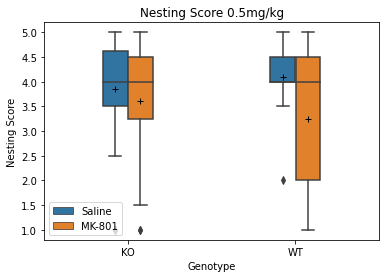

In [291]:
sns.boxplot(data=nest_05[nest_05['Dose (mg/Kg)']==0.5], x='Genotype', y='Nesting Score', hue='Tx', showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.3)
plt.title('Nesting Score 0.5mg/kg')
plt.legend(loc=3)

In [292]:
pg.normality(data= nest_05[(nest_05['Dose (mg/Kg)']==0.5)&(nest_05['Genotype']=='WT')].drop(45), dv = 'Nesting Score', group='Group')

,W,pval,normal
WTSaline,0.844293,0.005425,False
WTMK-801,0.825289,0.004606,False


In [254]:
nest_05['Nesting Score'][(nest_05['Dose (mg/Kg)']==0.5)&(nest_05['Genotype']=='WT')& (nest_05['Tx']=='Saline')]

6     4.0
7     4.0
8     5.0
12    4.0
13    4.5
14    4.0
25    4.0
26    5.0
34    4.5
35    4.0
43    4.0
44    4.0
45    2.0
51    4.0
52    4.0
70    3.5
71    3.5
74    4.5
75    4.5
88    5.0
Name: Nesting Score, dtype: float64

In [421]:
mk_wt = nest_05['Nesting Score'][(nest_05['Dose (mg/Kg)']==0.5)&(nest_05['Group']=='WTMK-801')]
sl_wt = nest_05['Nesting Score'][(nest_05['Dose (mg/Kg)']==0.5)&(nest_05['Group']=='WTSaline')].drop(45)
pg.mwu(mk_wt, sl_wt)

,U-val,tail,p-val,RBC,CLES
MWU,103.5,two-sided,0.058404,0.359133,0.582043


### Strong tendency on WT mice (0.5mg/kg)

In [294]:
nest_05['Group'].unique()

array(['KOMK-801', 'KOSaline', 'WTMK-801', 'WTSaline'], dtype=object)

In [295]:
pg.normality(data= nest_05[nest_05['Dose (mg/Kg)']==0.5], dv='Nesting Score', group='Group')

,W,pval,normal
KOSaline,0.830775,0.000163,False
WTSaline,0.809589,0.001205,False
KOMK-801,0.860853,0.010126,False
WTMK-801,0.825289,0.004606,False


In [296]:
pg.homoscedasticity(data= nest_r[nest_r['Dose (mg/Kg)']==0.5], dv='Nesting Score', group='Group')

,W,pval,equal_var
levene,0.067853,0.79606,True


In [297]:
pg.kruskal(nest_r[nest_r['Dose (mg/Kg)']==0.5], dv='Nesting Score', between='Group')

,Source,ddof1,H,p-unc
Kruskal,Group,1,0.724812,0.39457


#### NO effect over all

## Burrowing

In [401]:
burr_r = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/Burrowing.csv')

In [402]:
burr_r.columns

Index(['Sub', 'Genotype', 'UR', 'Sex', 'Tx', 'Dose (mg/Kg)', 'Initial weight',
       'Baseline (2 h)', 'Baseline (12 h)', 'Test (2 h)', 'Test (12 h)',
       '% Baseline (2 h)', '% Baseline (12 h)', '% Test (2 h)',
       '% Test (12 h)'],
      dtype='object')

In [403]:
burr_r = burr_r[['Sub', 'Genotype', 'UR', 'Sex', 'Tx', 'Dose (mg/Kg)', 'Test (12 h)', '% Test (12 h)']]

In [404]:
burr_r.dropna(how = 'any', inplace = True)

In [405]:
burr_r['Tx'] = burr_r['Tx'].str.rstrip()

In [406]:
burr_r['Tx'].unique()

array(['MK-801', 'Saline', 'Naive'], dtype=object)

In [407]:
burr_r.groupby(['Genotype', 'Tx', 'Dose (mg/Kg)'])['Sub'].count()

Genotype  Tx      Dose (mg/Kg)
HE        MK-801  1.0              6
          Saline  1.0              6
KO        MK-801  0.5             16
                  1.0              3
          Saline  0.5             11
                  1.0             20
WT        MK-801  0.5             13
                  1.0              8
          Naive   0.0              2
          Saline  0.5              9
                  1.0             11
Name: Sub, dtype: int64

In [410]:
burr_r['Test (12 h)']

0      188.89
1      277.68
2       51.73
3      191.10
4       46.49
        ...  
100    379.75
101    265.50
102    242.54
103    220.44
104     18.90
Name: Test (12 h), Length: 105, dtype: float64

In [409]:
burr_r.loc[burr_r['Tx'] == 'Naive', 'Tx'] = 'Saline'

In [411]:
burr_tidy = burr_r.copy()
burr_tidy.loc[burr_tidy['Tx'] =='Saline', 'Dose (mg/Kg)'] = 1

In [412]:
burr_tidy.columns

Index(['Sub', 'Genotype', 'UR', 'Sex', 'Tx', 'Dose (mg/Kg)', 'Test (12 h)',
       '% Test (12 h)'],
      dtype='object')

In [419]:
burr_tidy.groupby(['Genotype', 'Tx', 'Dose (mg/Kg)'])['Sub'].count()

Genotype  Tx      Dose (mg/Kg)
HE        MK-801  1.0              6
          Saline  1.0              6
KO        MK-801  0.5             16
                  1.0              3
          Saline  1.0             31
WT        MK-801  0.5             13
                  1.0              8
          Saline  1.0             22
Name: Sub, dtype: int64

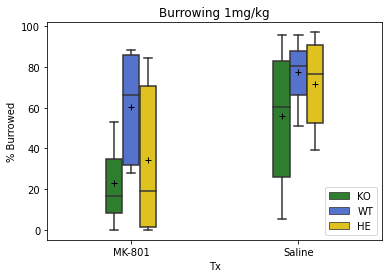

In [451]:
sns.boxplot(data=burr_tidy[burr_tidy['Dose (mg/Kg)']==1], x='Tx', y='% Test (12 h)', hue='Genotype', hue_order = ['KO', 'WT', 'HE'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.3, palette=['forestgreen', 'royalblue', 'gold'])
plt.title('Burrowing 1mg/kg')
plt.ylabel('% Burrowed')
plt.legend(loc=4)


### Effect of genotype on burrowing

In [435]:
# outlier detection
out = pg.madmedianrule(burr_tidy[(burr_tidy['Genotype']=='WT') & (burr_tidy['Tx'] == 'Saline')]['% Test (12 h)'])
idx = burr_tidy[(burr_tidy['Genotype']=='WT') & (burr_tidy['Tx'] == 'Saline')]['% Test (12 h)'].index.values
outs = idx[out]
outs

array([45, 48, 57])

In [444]:
burr_tidy.drop(outs, inplace = True)

In [467]:
burr_tidy['Group'] = burr_tidy['Genotype']+'_'+burr_tidy['Tx']

Text(0, 0.5, '% Burrowed')

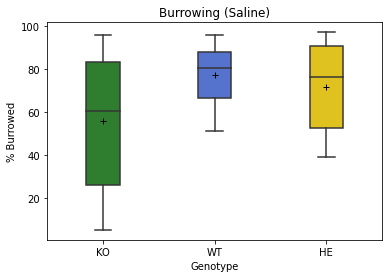

In [446]:
sns.boxplot(data=burr_tidy[(burr_tidy['Tx']=='Saline')], x='Genotype', y='% Test (12 h)', showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.3, palette=['forestgreen', 'royalblue', 'gold'])
plt.title('Burrowing (Saline)')
plt.ylabel('% Burrowed')

In [425]:
pg.normality(data=burr_tidy[(burr_tidy['Tx']=='Saline')&(burr_tidy['Dose (mg/Kg)']==1)], dv='% Test (12 h)', group='Genotype', method = 'normaltest')

ValueError: skewtest is not valid with less than 8 samples; 6 samples were given.

### Genotype Effect in Burrowing

In [441]:
pg.normality(WT_S, method = 'normaltest')

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,W,pval,normal
% Test (12 h),1.979861,0.371603,True


In [442]:
pg.normality(KO_S, method = 'normaltest')

,W,pval,normal
% Test (12 h),11.186248,0.003723,False


### WT vs KO Comparison

In [1]:
WT_S = burr_tidy[(burr_tidy['Tx']=='Saline')& (burr_tidy['Genotype']=='WT')]['Test (12 h)']
KO_S = burr_tidy[(burr_tidy['Tx']=='Saline')& (burr_tidy['Genotype']=='KO')]['Test (12 h)']
pg.mwu(WT_S, KO_S)

NameError: name 'burr_tidy' is not defined

### All Groups

In [468]:
pg.kruskal(burr_tidy, dv = '% Test (12 h)', between = 'Group')

,Source,ddof1,H,p-unc
Kruskal,Group,5,22.18458,0.000483


#### Genotype significantly affects burrowing

### Effect of MK-801 1mg/kg on WT mice

In [448]:
pg.normality(data = burr_tidy[(burr_tidy['Dose (mg/Kg)']==1)&(burr_tidy['Genotype']=='WT')], dv='% Test (12 h)', group='Tx', method = 'normaltest')

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,W,pval,normal
MK-801,5.255871,0.072227,True
Saline,1.979861,0.371603,True


In [449]:
WT_S = burr_tidy['% Test (12 h)'][(burr_tidy['Dose (mg/Kg)']==1)&(burr_tidy['Genotype']=='WT')&(burr_tidy['Tx']== 'Saline')]
WT_MK = burr_tidy['% Test (12 h)'][(burr_tidy['Dose (mg/Kg)']==1)&(burr_tidy['Genotype']=='WT')&(burr_tidy['Tx']== 'MK-801')]

In [450]:
pg.ttest(WT_S, WT_MK)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,1.63712,8.293884,two-sided,0.138901,"[-6.7, 40.22]",0.917077,0.976,0.552528


Text(0, 0.5, '% Burrowed')

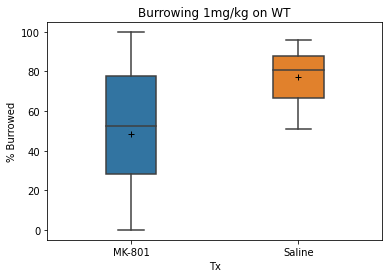

In [477]:
sns.boxplot(data=burr_tidy[(burr_tidy['Genotype']=='WT')], x='Tx', y='% Test (12 h)', showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.3)
plt.title('Burrowing 1mg/kg on WT')
plt.ylabel('% Burrowed')

#### no net effect but very low power

### MK-801 0.5mg/kg

In [454]:
burr_05 = burr_tidy.copy()

In [456]:
burr_05.loc[burr_05['Tx'] =='Saline', 'Dose (mg/Kg)'] = 0.5
burr_05 = burr_05[burr_05['Genotype']!= 'HE']

In [472]:
burr_05['Group'] = burr_05['Genotype']+'_'+burr_05['Tx']

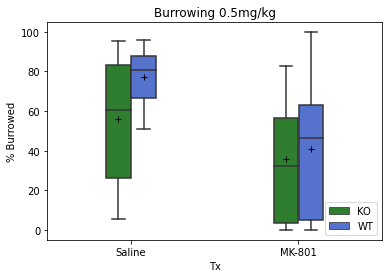

In [459]:
sns.boxplot(data=burr_05[burr_05['Dose (mg/Kg)']==0.5], x='Tx', y='% Test (12 h)', hue='Genotype', showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.3, palette=['forestgreen', 'royalblue'])
plt.title('Burrowing 0.5mg/kg')
plt.ylabel('% Burrowed')
plt.legend(loc=4)


In [469]:
WT_S = burr_05['% Test (12 h)'][(burr_05['Dose (mg/Kg)']==0.5)&(burr_05['Genotype']=='WT')&(burr_05['Tx']== 'Saline')]
WT_MK = burr_05['% Test (12 h)'][(burr_05['Dose (mg/Kg)']==0.5)&(burr_05['Genotype']=='WT')&(burr_05['Tx']== 'MK-801')]
KO_S = burr_05['% Test (12 h)'][(burr_05['Dose (mg/Kg)']==0.5)&(burr_05['Genotype']=='KO')&(burr_05['Tx']== 'Saline')]
KO_MK = burr_05['% Test (12 h)'][(burr_05['Dose (mg/Kg)']==0.5)&(burr_05['Genotype']=='KO')&(burr_05['Tx']== 'MK-801')]


In [464]:
pg.normality(WT_S, method = 'normaltest')

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,W,pval,normal
% Test (12 h),1.979861,0.371603,True


In [465]:
pg.normality(WT_MK, method = 'normaltest')

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,W,pval,normal
% Test (12 h),2.082997,0.352925,True


In [470]:
pg.normality(KO_MK, method = 'normaltest')

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,W,pval,normal
% Test (12 h),3.665428,0.159979,True


In [471]:
pg.normality(KO_S, method = 'normaltest')

,W,pval,normal
% Test (12 h),11.186248,0.003723,False


##### MK-801 0.5mg/kg on WT mice

In [466]:
pg.ttest(WT_S, WT_MK)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,3.675181,14.363825,two-sided,0.002402,"[15.17, 57.44]",1.532528,32.826,0.984534


#### All groups

In [475]:
pg.welch_anova(burr_05, dv = '% Test (12 h)', between = 'Group')

,Source,ddof1,ddof2,F,p-unc,np2
0,Group,3,43.378522,14.767719,9.116953e-07,0.21652


In [476]:
pg.pairwise_gameshowell(burr_05, dv = '% Test (12 h)', between = 'Group')

,A,B,mean(A),mean(B),diff,se,tail,T,df,pval,hedges
0,KO_MK-801,KO_Saline,33.796184,55.884758,-22.088574,6.257218,two-sided,-2.496154,38.030256,0.065135,-0.715852
1,KO_MK-801,WT_MK-801,33.796184,48.493452,-14.697268,7.039631,two-sided,-1.476290,37.948311,0.453747,-0.458142
2,KO_MK-801,WT_Saline,33.796184,77.350263,-43.554079,5.359349,two-sided,-5.746479,24.203661,0.001000,-1.825291
3,KO_Saline,WT_MK-801,55.884758,48.493452,7.391306,6.319382,two-sided,0.827050,40.952996,0.819506,0.230221
4,KO_Saline,WT_Saline,55.884758,77.350263,-21.465505,4.370447,two-sided,-3.472964,43.895981,0.003519,-0.995983
5,WT_MK-801,WT_Saline,48.493452,77.350263,-28.856811,5.431798,two-sided,-3.756555,26.606200,0.001478,-1.165784
